# LETSGROWMORE DATA SCIENCE INTERN TASK JUNE 2023


# TASK - 01

# Iris Flowers Classification ML Project




By Harish Nandhan S

Dataset Link: http://archive.ics.uci.edu/ml/machine-learning-databases/iris

### Importing the Required Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix 

In [4]:
data_frame = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
                          names = ['sepal_length_in_cm','sepal_width_in_cm','petal_length_in_cm',
                                   'petal_width_in_cm','categories_of_flower'] )

In [5]:
data_frame

,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm,categories_of_flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
data_frame.head()

,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm,categories_of_flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
data_frame.dtypes

sepal_length_in_cm      float64
sepal_width_in_cm       float64
petal_length_in_cm      float64
petal_width_in_cm       float64
categories_of_flower     object
dtype: object

In [8]:
dir(data_frame)

['T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 

In [9]:
data_frame.shape

(150, 5)

In [10]:
data_frame.columns

Index(['sepal_length_in_cm', 'sepal_width_in_cm', 'petal_length_in_cm',
       'petal_width_in_cm', 'categories_of_flower'],
      dtype='object')

In [11]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sepal_length_in_cm    150 non-null    float64
 1   sepal_width_in_cm     150 non-null    float64
 2   petal_length_in_cm    150 non-null    float64
 3   petal_width_in_cm     150 non-null    float64
 4   categories_of_flower  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
data_frame.isnull().sum()

sepal_length_in_cm      0
sepal_width_in_cm       0
petal_length_in_cm      0
petal_width_in_cm       0
categories_of_flower    0
dtype: int64

In [13]:
data_frame['categories_of_flower'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [14]:
data_frame.describe()

,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Data Visualisation

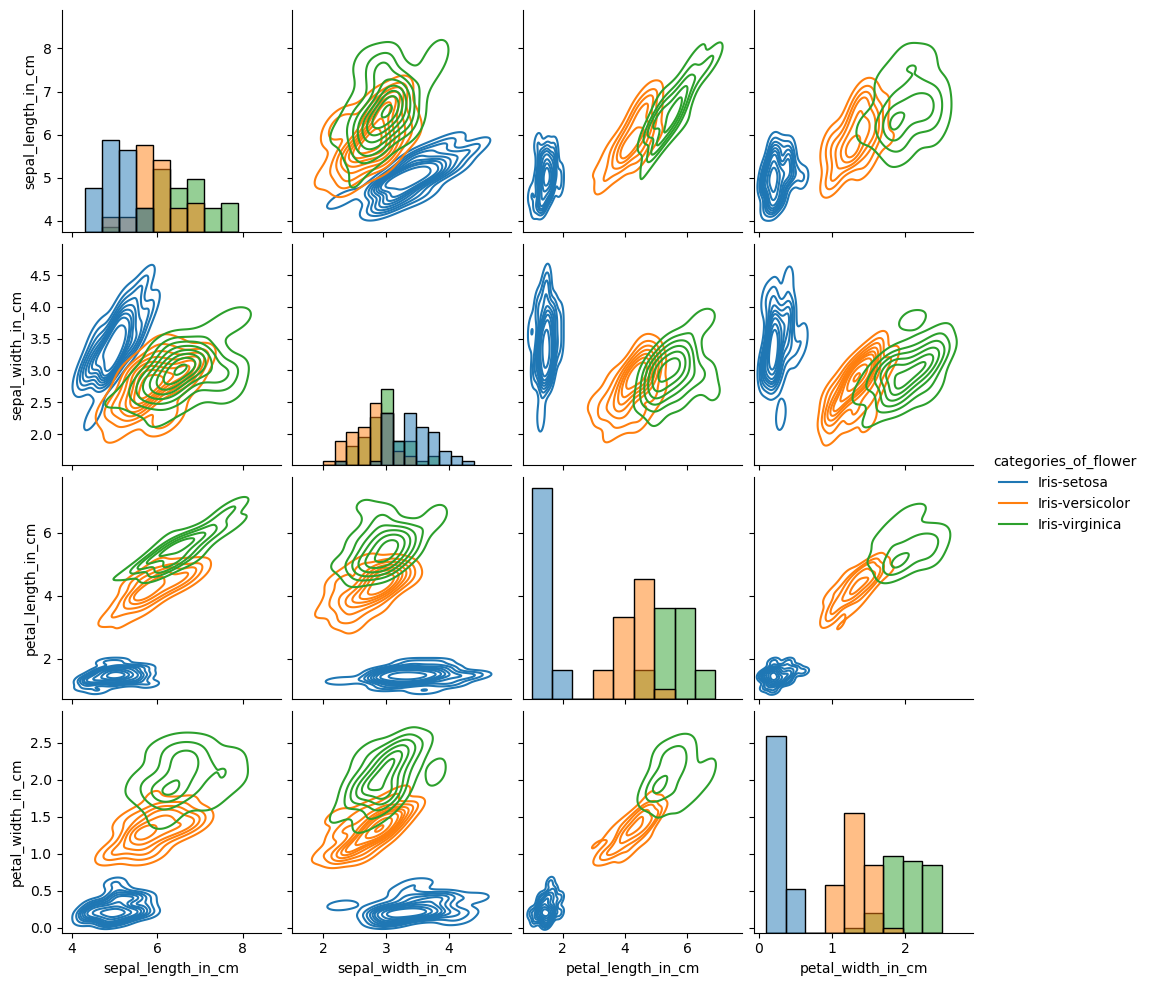

In [15]:
sns.pairplot(data_frame, hue = "categories_of_flower", kind = 'kde', diag_kind = 'hist')

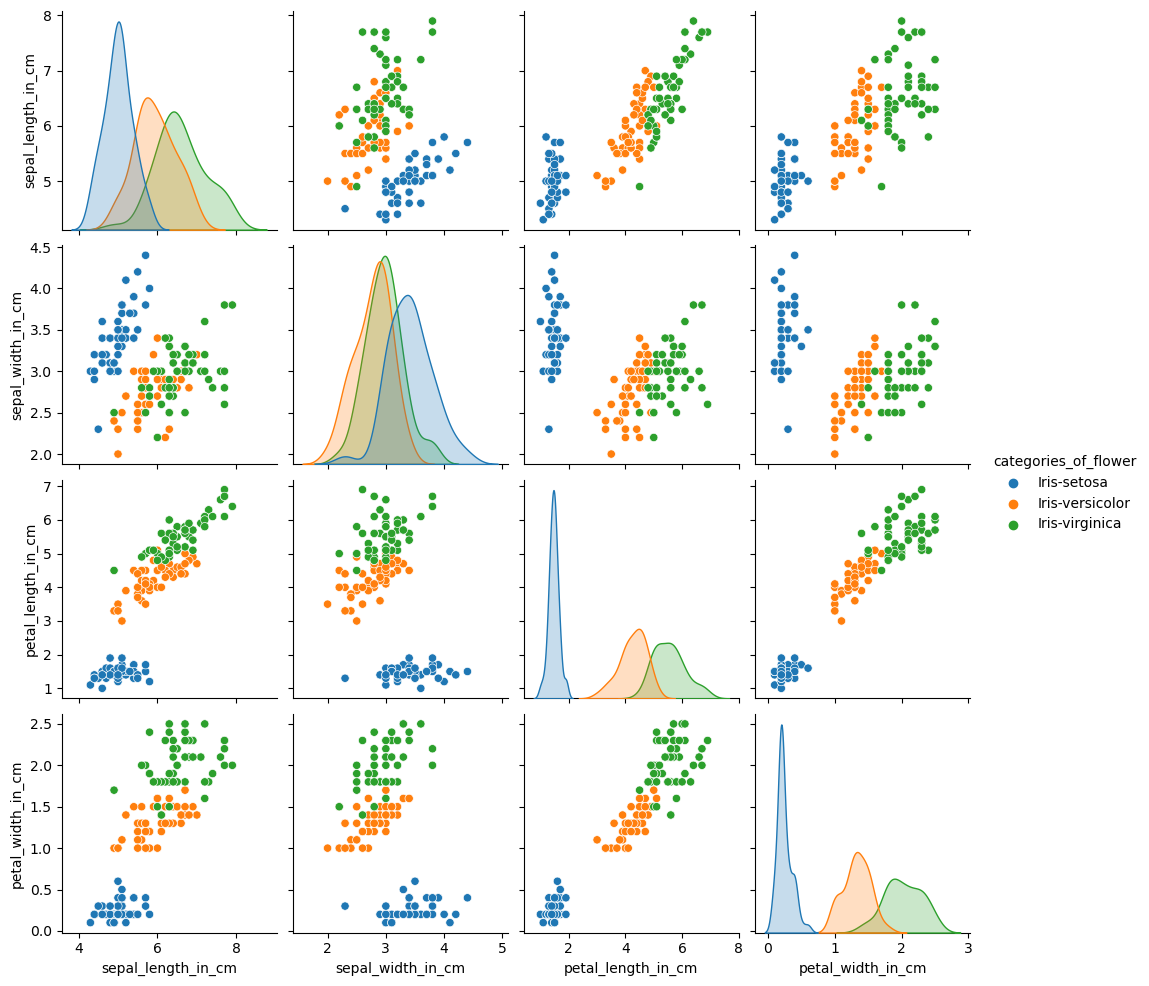

In [16]:
sns.pairplot(data_frame,hue = "categories_of_flower" )

<AxesSubplot:xlabel='sepal_width_in_cm', ylabel='petal_width_in_cm'>

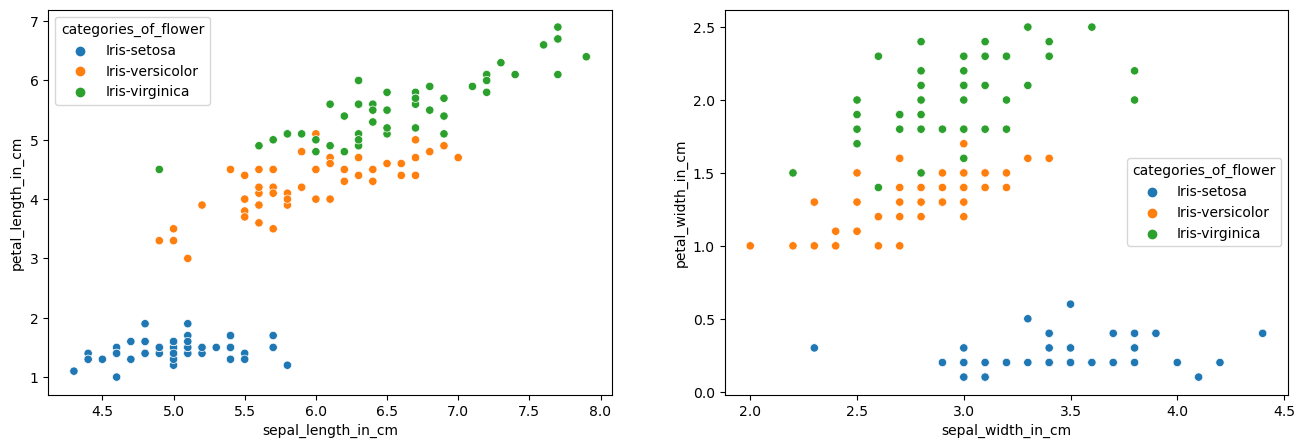

In [17]:
fig,(rect1, rect2)=plt.subplots(ncols=2,figsize=(16,5))
sns.scatterplot(x = "sepal_length_in_cm", y= "petal_length_in_cm", data = data_frame, hue = "categories_of_flower",ax = rect1)
sns.scatterplot(x = "sepal_width_in_cm", y = "petal_width_in_cm", data = data_frame, hue = "categories_of_flower", ax = rect2)

<AxesSubplot:ylabel='petal_width_in_cm'>

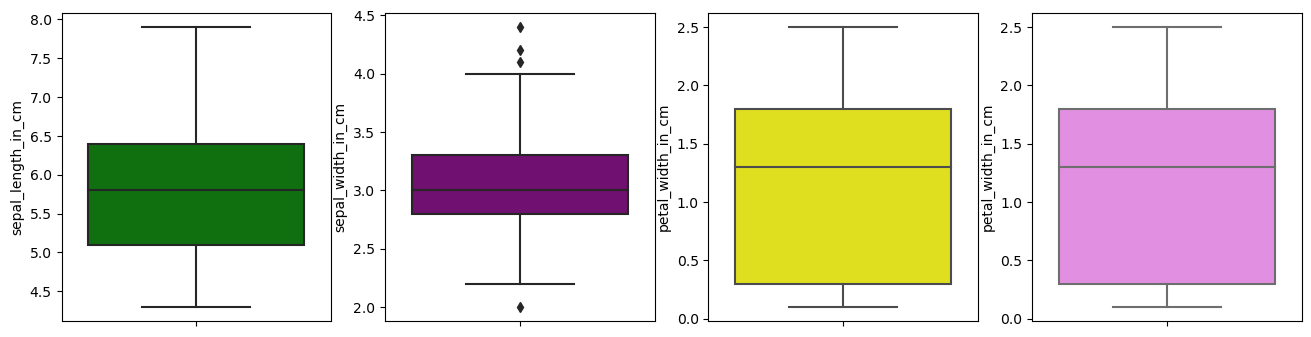

In [18]:
plt.figure(figsize=(16,4))
plt.subplot(1,4,1)
sns.boxplot(data=data_frame,y='sepal_length_in_cm', color = 'green')
plt.subplot(1,4,2)
sns.boxplot(data=data_frame,y='sepal_width_in_cm',color='purple')
plt.subplot(1,4,3)
sns.boxplot(data=data_frame,y='petal_width_in_cm',color='yellow')
plt.subplot(1,4,4)
sns.boxplot(data=data_frame,y='petal_width_in_cm',color= 'violet')

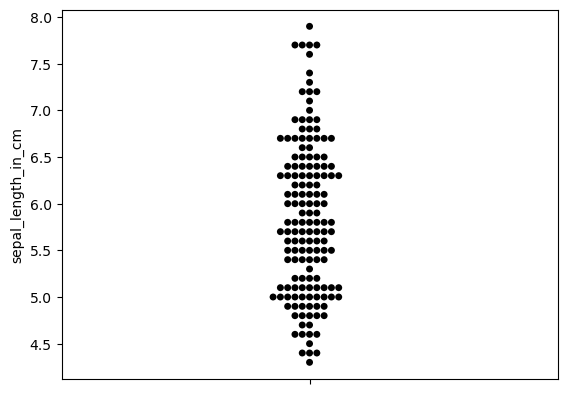

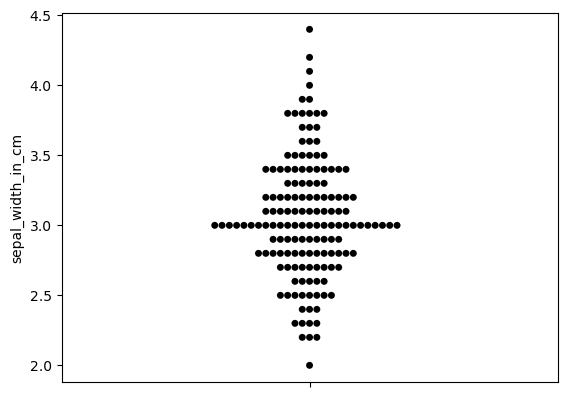

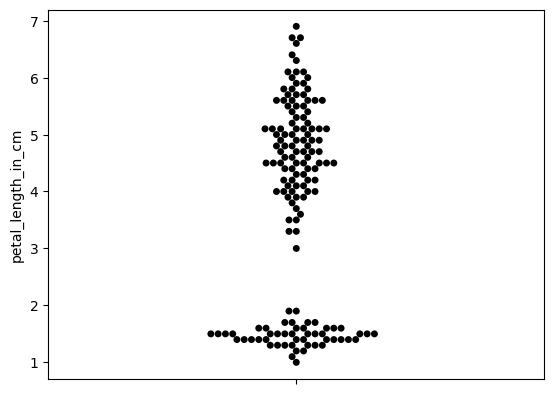

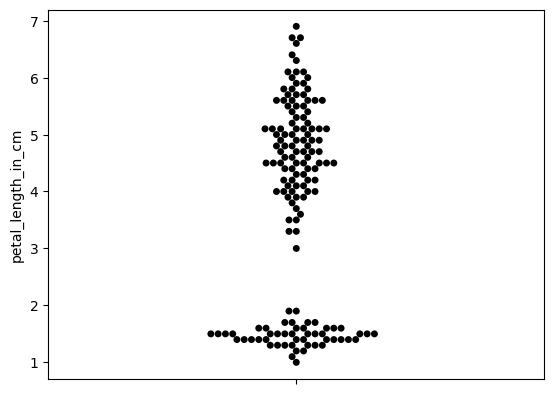

In [19]:
sns.swarmplot(data = data_frame, y = "sepal_length_in_cm", edgecolor = "yellow", color = "black" )
plt.show()
sns.swarmplot(data = data_frame, y = "sepal_width_in_cm", edgecolor = "yellow", color = "black" )
plt.show()
sns.swarmplot(data = data_frame, y = "petal_length_in_cm", edgecolor = "yellow", color = "black" )
plt.show()
sns.swarmplot(data = data_frame, y = "petal_length_in_cm", edgecolor = "yellow", color = "black" )
plt.show()

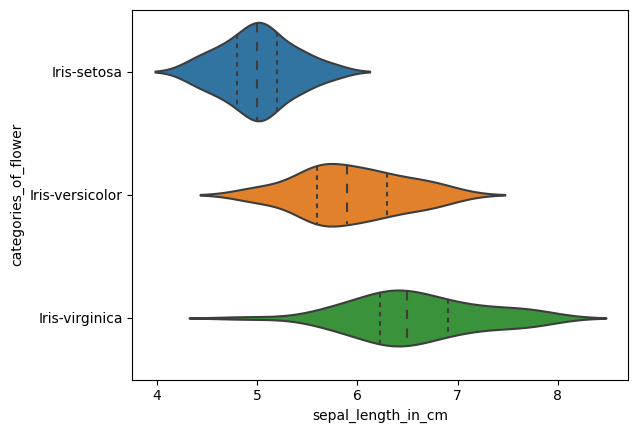

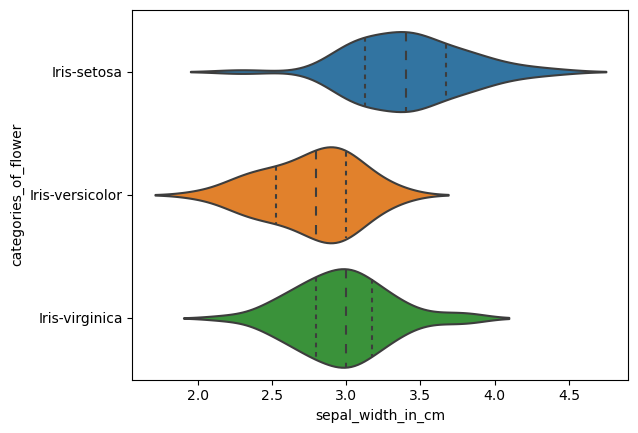

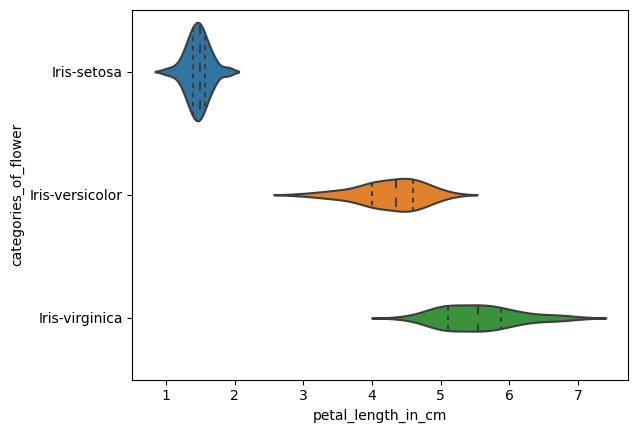

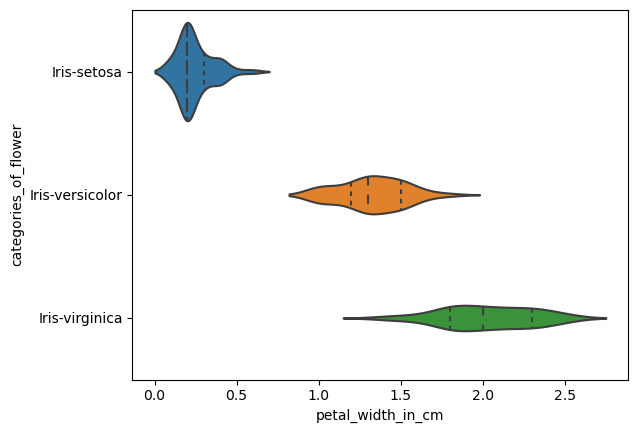

In [20]:
sns.violinplot(y='categories_of_flower', x='sepal_length_in_cm', data=data_frame, inner='quartile')
plt.show()
sns.violinplot(y='categories_of_flower', x='sepal_width_in_cm', data=data_frame, inner='quartile')
plt.show()
sns.violinplot(y='categories_of_flower', x='petal_length_in_cm', data=data_frame, inner='quartile')
plt.show()
sns.violinplot(y='categories_of_flower', x='petal_width_in_cm', data=data_frame, inner='quartile')
plt.show()

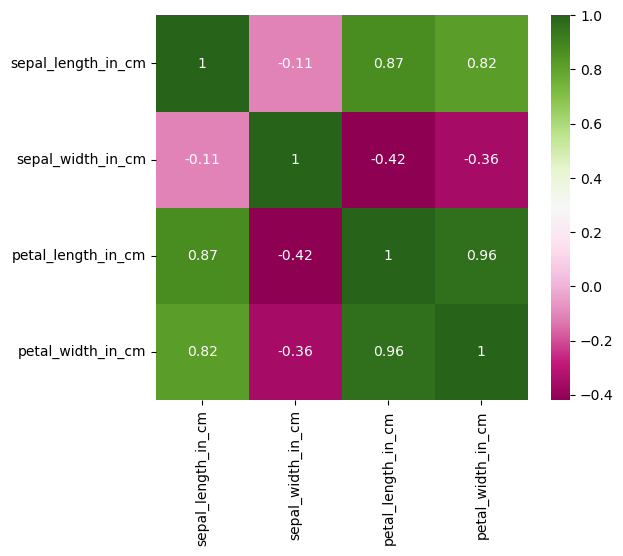

In [22]:
plt.figure(figsize=(6,5))
sns.heatmap(data_frame.corr(), annot=True,cmap='PiYG')
plt.show()

## Building Model, Training and Testing

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [24]:
data_frame['categories_of_flower'] = le.fit_transform = (data_frame['categories_of_flower'])
data_frame.head(10)

,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm,categories_of_flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [25]:
from sklearn.model_selection import train_test_split
X = data_frame.drop(columns=['categories_of_flower'])
Y = data_frame['categories_of_flower']
x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size = 0.3)

## Logistic Regression

In [26]:
# Initialize a Logistic Regression
logistic_model= LogisticRegression(max_iter=1000)

In [27]:
logistic_model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [28]:
# Predict on the test set and calculate accuracy
y_pred=logistic_model.predict(x_test)
score=accuracy_score(y_test,y_pred)

In [30]:
def report(model):
    preds=model.predict(x_test)
    print(classification_report(preds,y_test))
    cm = confusion_matrix(y_test, preds, labels = model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_)
    disp.plot()
    plt.show()

Logistic Regression
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.93      1.00      0.97        14
 Iris-virginica       1.00      0.94      0.97        16

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



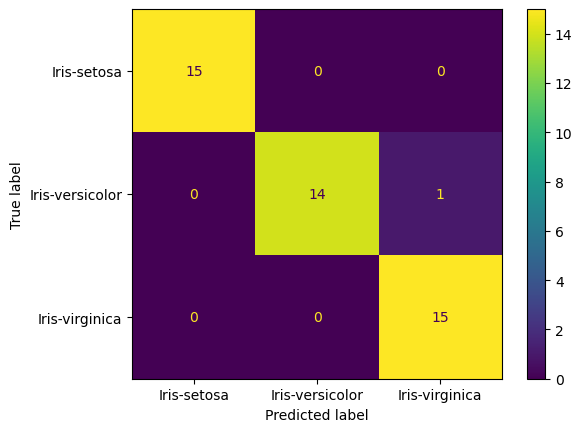

Accuracy: 97.78%


In [31]:
print('Logistic Regression')
report(logistic_model)
print(f'Accuracy: {round(score*100,2)}%')

## Decision Tree Classifier

In [32]:
decision_tree_model = DecisionTreeClassifier()

In [33]:
decision_tree_model = decision_tree_model.fit(x_train, y_train)

In [34]:
# Predict on the test set and calculate accuracy
y_pred= decision_tree_model.predict(x_test)
score=accuracy_score(y_test,y_pred)

Decision Tree Classifier
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.93      0.93      0.93        15
 Iris-virginica       0.93      0.93      0.93        15

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



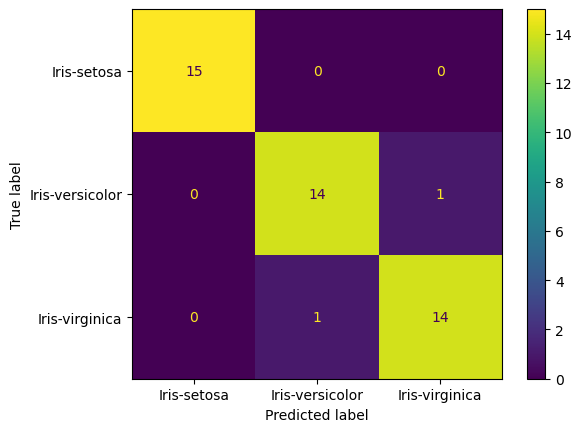

Accuracy: 95.56%


In [35]:
print('Decision Tree Classifier')
report(decision_tree_model)
print(f'Accuracy: {round(score*100,2)}%')

## Liner SVC [ Support Vector Classifier ] 

In [36]:
# Initialize a Linear SVC
svc_model = SVC()
svc_model.fit(x_train,y_train)
L_svc_model=LinearSVC()

In [37]:
L_svc_model.fit(x_train,y_train)

C:\Users\haris\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [38]:
# Predict on the test set and calculate accuracy
y_pred=L_svc_model.predict(x_test)
score=accuracy_score(y_test,y_pred)

Linear Support Vector Classifier
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.80      0.92      0.86        13
 Iris-virginica       0.93      0.82      0.87        17

       accuracy                           0.91        45
      macro avg       0.91      0.92      0.91        45
   weighted avg       0.92      0.91      0.91        45



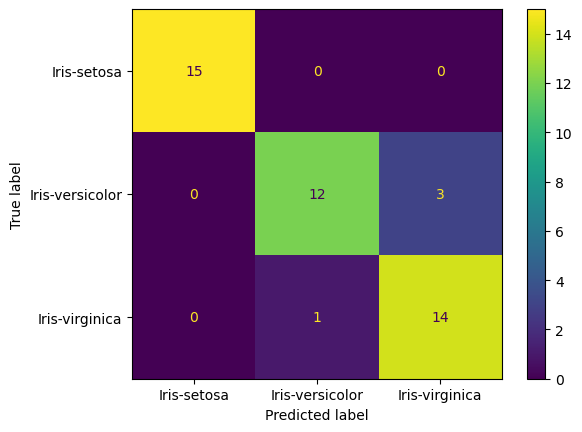

Accuracy: 91.11%


In [39]:
print('Linear Support Vector Classifier')
report(L_svc_model)
print(f'Accuracy: {round(score*100,2)}%')


## Naive Bayes 

In [40]:
naive_model = MultinomialNB()

In [41]:
naive_model.fit(x_train, y_train)

MultinomialNB()

In [42]:
# Predict on the test set and calculate accuracy
y_pred= naive_model.predict(x_test)
score=accuracy_score(y_test,y_pred)

Naive Bayes
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.93      0.93      0.93        15
 Iris-virginica       0.93      0.93      0.93        15

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



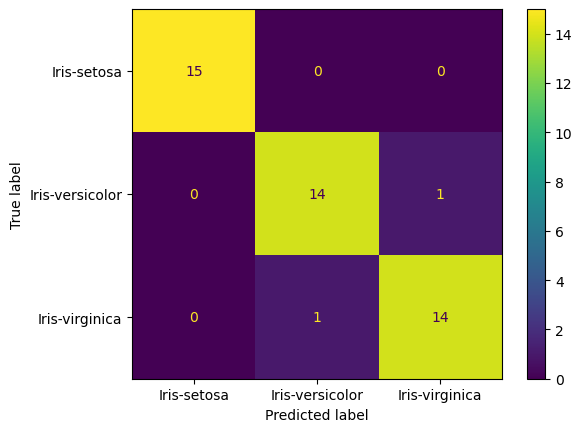

Accuracy: 95.56%


In [43]:
print('Naive Bayes')
report(naive_model)
print(f'Accuracy: {round(score*100,2)}%')

## K - Nearest Neighbours [ KNN ]

In [44]:
knn_model = KNeighborsClassifier(n_neighbors=6)

In [45]:
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [46]:
# Predict on the test set and calculate accuracy
y_pred= knn_model.predict(x_test)
score=accuracy_score(y_test,y_pred)

C:\Users\haris\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


K - Nearest Neighbours [ KNN]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        15
 Iris-virginica       1.00      1.00      1.00        15

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



C:\Users\haris\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


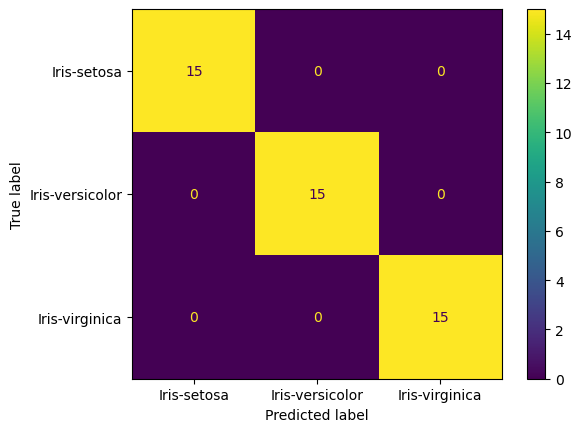

Accuracy: 100.0%


In [47]:
print('K - Nearest Neighbours [ KNN]')
report(knn_model)
print(f'Accuracy: {round(score*100,2)}%')

## All Algorithms Accuracy Chart

In [48]:
details = { 'Regression':['Logistic Regression','Decision Tree','Linear SVC','Naive Bayes', 'KNN'],
    'Accuracy':[logistic_model.score(x_test,y_test),decision_tree_model.score(x_test,y_test),L_svc_model.score(x_test,y_test),naive_model.score(x_test,y_test),knn_model.score(x_test,y_test)]}

C:\Users\haris\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [49]:
data_nparray = np.array([['Logistic Regression', logistic_model.score(x_test,y_test)],
                          ['Decision Tree',decision_tree_model.score(x_test,y_test)],
                         ['Linear SVC', L_svc_model.score(x_test,y_test)],
                         ['Naive Bayes',naive_model.score(x_test,y_test)],
                         ['KNN',knn_model.score(x_test,y_test)]])


print_details = pd.DataFrame(data=data_nparray, columns=[ 'Regression', 'Accuracy'])
print_details

C:\Users\haris\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


,Regression,Accuracy
0,Logistic Regression,0.9777777777777777
1,Decision Tree,0.9555555555555556
2,Linear SVC,0.9111111111111111
3,Naive Bayes,0.9555555555555556
4,KNN,1.0


C:\Users\haris\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


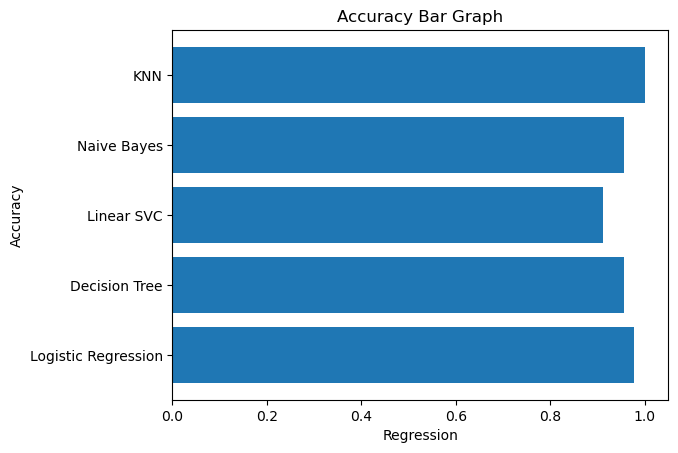

In [50]:
x_axis = ['Logistic Regression','Decision Tree','Linear SVC', 'Naive Bayes', 'KNN']
y_axis = [logistic_model.score(x_test,y_test),decision_tree_model.score(x_test,y_test),L_svc_model.score(x_test,y_test),naive_model.score(x_test,y_test),knn_model.score(x_test,y_test)]
plt.barh(x_axis,y_axis)
plt.xlabel('Regression')
plt.ylabel('Accuracy')
plt.title('Accuracy Bar Graph')
plt.show()

## THANK YOU!!